<a href="https://colab.research.google.com/github/Saeif-Saleh/Banking-System/blob/master/Classify_different_antennas_2450_175_improved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!nvidia-smi
# !pip install --upgrade tensorflow


Tue Mar 24 04:41:00 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
import scipy.io
import numpy as np

In [0]:
matlab_data=scipy.io.loadmat('/content/drive/My Drive/thesis_data/Antenna/R2450_175.mat')

In [11]:
print(list(matlab_data.keys())[3:])

['R2450_T2450_test', 'R2450_T2450_train', 'R2450_T500_test', 'R2450_T500_train', 'R2450_T900_test', 'R2450_T900_train']


In [0]:
train_900=matlab_data['R2450_T900_train']
train_2450=matlab_data['R2450_T2450_train']
train_500=matlab_data['R2450_T500_train']
# train_lime=matlab_data['R2450_Tlime_train']

In [13]:
print(train_900.shape)
print(train_2450.shape)
print(train_500.shape)

(67607243, 2)
(68196855, 2)
(66462243, 2)


In [0]:
test_900=matlab_data['R2450_T900_test']
test_2450=matlab_data['R2450_T2450_test']
test_500=matlab_data['R2450_T500_test']
# test_lime=matlab_data['R2450_T2450_test']

In [15]:
print(test_900.shape)
print(test_2450.shape)
print(test_500.shape)

(16289065, 2)
(14714767, 2)
(14282288, 2)


In [16]:
print(train_900.shape)
print(train_2450.shape)
print(train_500.shape)

(67607243, 2)
(68196855, 2)
(66462243, 2)


In [0]:
#Slicing data to be divisible by 2**n 
# train_900=train_900[1000000:5194304]
# train_2450=train_2450[1000000:5194304]
# train_500=train_500[1000000:5194304]

train_900=train_900[1000000:34554432]
train_2450=train_2450[1000000:34554432]
train_500=train_500[1000000:34554432]






In [0]:
test_900=test_900[1000000:9388608]
test_2450=test_2450[1000000:9388608]
test_500=test_500[1000000:9388608]



In [19]:
#Concatenate training and test data
train_x=np.concatenate((train_900,train_2450,train_500),axis=0)
test_x=np.concatenate((test_900,test_2450,test_500),axis=0)
print(train_x.shape)
print(test_x.shape)


(100663296, 2)
(25165824, 2)


In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers

Using TensorFlow backend.


In [0]:
n_classes=3
sample_size=128

In [0]:
train_x=train_x.reshape(-1,2,sample_size)
test_x=test_x.reshape(-1,2,sample_size)

In [0]:
#Creating train_y
train_y=np.zeros(len(train_x))
seprator=int(len(train_y)/n_classes)
train_y[0:seprator]=0
train_y[seprator:2*seprator]=1
train_y[2*seprator:3*seprator]=2
# train_y[3*seprator:]=3
#Creating test_y
test_y=np.zeros(len(test_x))
seprator=int(len(test_y)/n_classes)
test_y[0:seprator]=0
test_y[seprator:2*seprator]=1
test_y[2*seprator:3*seprator]=2
# test_y[3*seprator:]=3

In [0]:
train_y=tf.keras.utils.to_categorical(
    train_y,
    num_classes=n_classes,
    dtype='float32'
)
test_y=tf.keras.utils.to_categorical(
    test_y,
    num_classes=n_classes,
    dtype='float32'
)

In [25]:
print(train_x.shape)
print(train_y.shape)

(786432, 2, 128)
(786432, 3)


In [0]:
img_rows=sample_size
img_cols=2
train_x = train_x.reshape(-1, img_rows, img_cols, 1)
test_x=test_x.reshape(-1,img_rows,img_cols,1)
input_shape = (img_rows, img_cols, 1)

In [27]:
print(train_x.shape)
print(train_y.shape)

(786432, 128, 2, 1)
(786432, 3)


In [0]:
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=0.20, shuffle= True)


In [0]:
def create_model():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Conv2D(64, (1, 2), padding='same', activation='elu'))

  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Conv2D(128, (1, 2), padding='same', activation='elu'))

  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Conv2D(256, (1, 2), padding='same', activation='elu'))

  model.add(tf.keras.layers.Dropout(0.25))
  model.add(tf.keras.layers.BatchNormalization())

  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(256))
  model.add(tf.keras.layers.Activation('elu'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(3))
  model.add(tf.keras.layers.Activation('softmax'))
  return model

In [30]:
conv_model=create_model()
conv_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history=conv_model.fit(train_x, train_y, validation_data=(valid_x,valid_y), epochs=10,shuffle=True)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 629145 samples, validate on 157287 samples
Epoch 1/10
629145/629145 [==============================] - 178s 282us/sample - loss: 1.1060 - acc: 0.4101 - val_loss: 1.0868 - val_acc: 0.3322
Epoch 2/10
629145/629145 [==============================] - 170s 270us/sample - loss: 0.5704 - acc: 0.7207 - val_loss: 0.1372 - val_acc: 0.9759
Epoch 3/10
629145/629145 [==============================] - 170s 270us/sample - loss: 0.0509 - acc: 0.9850 - val_loss: 0.3601 - val_acc: 0.9081
Epoch 4/10
629145/629145 [==============================] - 170s 270us/sample - loss: 0.0387 - acc: 0.9898 - val_loss: 14.2889 - val_acc: 0.6650
Epoch 5/10
629145/629145 [==============================] - 170s 270us/sample - loss: 0.0340 - acc: 0.9917 - val_loss: 0.1018 - val_acc: 0.9878
Epoch 6/10
629145/629145 [==============================] - 170s 270us/sample - loss: 0.0329 - acc: 0.9924 - val_loss: 0.1266 - val_acc: 0.9894
Ep

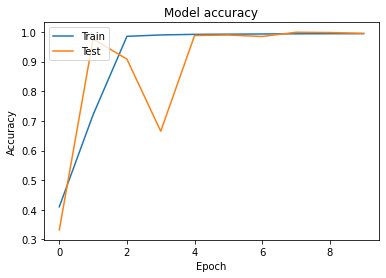

In [31]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

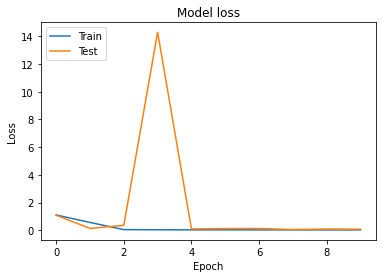

In [32]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
from sklearn.metrics import classification_report, confusion_matrix


In [34]:
conv_model.evaluate(test_x,test_y)

196608/196608 [==============================] - 16s 83us/sample - loss: 0.3613 - acc: 0.9049


[0.36128734009735575, 0.9049225]

In [0]:
import pandas as pd
import seaborn as sns
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

In [0]:
y_pred=conv_model.predict(test_x)

In [0]:
matrix = confusion_matrix(test_y.argmax(axis=1), y_pred.argmax(axis=1))


Figure(720x504)


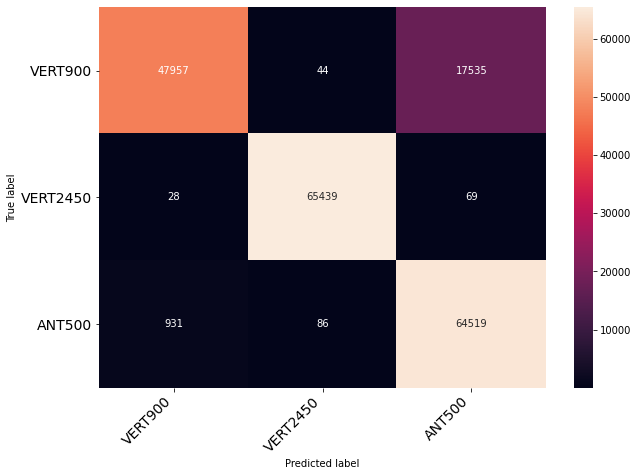

In [38]:
print(print_confusion_matrix(matrix,['VERT900','VERT2450','ANT500']))

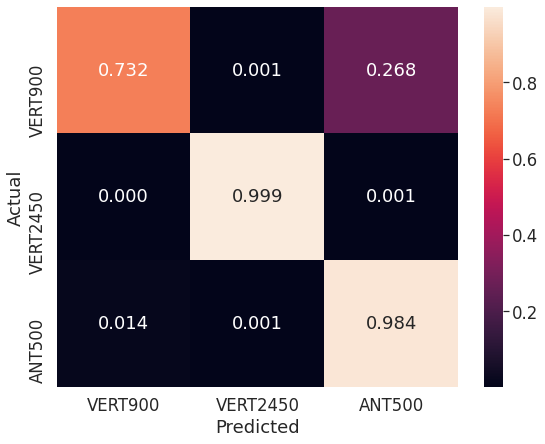

In [39]:
target_names='VERT900','VERT2450','ANT500'
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(test_y.argmax(axis=1),y_pred.argmax(axis=1))
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(9,7))
sns.heatmap(cmn, annot=True, fmt='.3f', xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [40]:
from sklearn.metrics import classification_report

print('\033[1m'+classification_report(test_y.argmax(axis=1), y_pred.argmax(axis=1), target_names=target_names))

              precision    recall  f1-score   support

     VERT900       0.98      0.73      0.84     65536
    VERT2450       1.00      1.00      1.00     65536
      ANT500       0.79      0.98      0.87     65536

    accuracy                           0.90    196608
   macro avg       0.92      0.90      0.90    196608
weighted avg       0.92      0.90      0.90    196608

